In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [42]:
pd.set_option("display.max_columns", 50)
# pd.set_option("display.max_rows", 1000)


In [43]:
df = pd.read_excel("Japan_Data.xlsx")

In [44]:
df = df.drop(df.index[range(0, 7)])
df = df.astype('float64')
df["Year"] = df["Series"].astype('int')

In [45]:
df

,Series,GDP,Priv. Consumption,Gov. Consumption,Priv. Inverstment,Gov. Investment,Inventory,Net Exports,GDP Deflator,Compensation of Employee,Wage and Salaries,Employed person,Employee,Hours worked,Fixed Assets,Real Compensation of Employee,Share of labor compensation,Real Wage and Salaries,Real Wage and Salaries.1,Fixed Assets.1,CPI,Population over 15,Labor force,Number of employed person,Employee.1,Population,Penn GDP,Labor Share,Capital,TFP,Entry,Exit,M2,M3,Nikkei225,Nikkei225 Return,General Government \nnet lending/borrowing,Net Lending/Borrowing,Primary Net Lending/Borrowing,Primary Net Lending/Borrowing.1,General Government Net Debt,Net Debt,General Government Gross Debt,Gross Debt,Year
7,1950.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84.274267,2.728260e+05,0.620528,9.723618e+05,NaN,NaN,NaN,NaN,NaN,101.682222,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1950
8,1951.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85.640724,2.972347e+05,0.620528,1.025208e+06,NaN,NaN,NaN,NaN,NaN,136.404223,0.341476,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1951
9,1952.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.943150,3.339826e+05,0.620528,1.064209e+06,NaN,NaN,NaN,NaN,NaN,245.637000,0.800802,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1952
10,1953.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5701.0,3989.0,3913.0,1660.0,88.145992,3.563725e+05,0.620528,1.099585e+06,NaN,NaN,NaN,NaN,NaN,389.682892,0.586418,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1953
11,1954.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5808.0,4055.0,3963.0,1707.0,89.250869,3.741025e+05,0.620528,1.143399e+06,0.464311,NaN,NaN,NaN,NaN,340.678353,-0.125755,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1954
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,2018.0,554439.5,302635.0,108431.2,111015.4,27572.9,2077.3,2875.6,100.3,281350.2,238647.6,6800.6,6007.8,1724.3,1949570.0,280508.673978,50.593198,237933.798604,3.960415e+06,1.943739e+06,99.5,11108.0,6720.0,6530.0,5819.0,127.202192,5.065208e+06,0.563644,2.604955e+07,0.994666,0.056,0.035,2.933333,2.525000,22310.726816,0.103998,-14998.500,-2.697,-10582.600,-1.903,840719.200,151.157,1293192.100,232.509,2018
76,2019.0,553106.9,300998.0,110503.0,111935.6,28029.6,1399.6,323.6,101.0,286892.4,243182.6,6861.5,6076.0,1688.0,1996996.5,284051.881188,51.355693,240774.851485,3.962720e+06,1.977224e+06,100.0,11101.0,6830.0,6664.0,5936.0,126.860301,5.099254e+06,0.563644,2.613882e+07,1.004506,0.044,0.035,2.375000,2.025000,21697.226141,-0.027498,-17432.500,-3.114,-13637.100,-2.436,844301.000,150.805,1318186.700,235.448,2019
77,2020.0,528178.9,285180.9,113041.9,104389.8,29125.5,614.2,-4518.9,101.9,283352.2,239770.4,6826.5,6048.0,1646.8,1986709.5,278068.891070,52.646725,235299.705594,3.890537e+06,1.949666e+06,100.0,11092.0,6886.0,6724.0,6004.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.450000,5.341667,22705.016173,0.046448,-55382.324,-10.281,-51435.034,-9.548,899683.324,167.014,1368968.630,254.130,2020
78,2021.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.8,11080.0,6868.0,6676.0,5973.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.483333,5.583333,28836.538653,0.270051,-49814.021,-9.000,-46693.028,-8.436,949497.345,171.547,1421696.684,256.860,2021


## 02/25

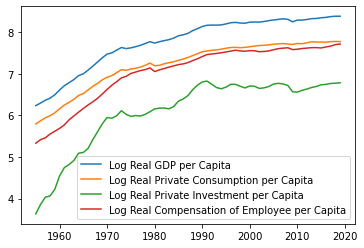

In [46]:
fig, ax = plt.subplots()
x = df["Year"]

y = np.log(df["GDP"] / df["Population"])
ax.plot(x, y, label="Log Real GDP per Capita")

y = np.log(df["Priv. Consumption"] / df["Population"])
ax.plot(x, y, label="Log Real Private Consumption per Capita")

y = np.log(df["Priv. Inverstment"] / df["Population"])
ax.plot(x, y, label="Log Real Private Investment per Capita")

y = np.log(df["Real Compensation of Employee"] / df["Population"])
ax.plot(x, y, label="Log Real Compensation of Employee per Capita")

ax.legend()
plt.show()


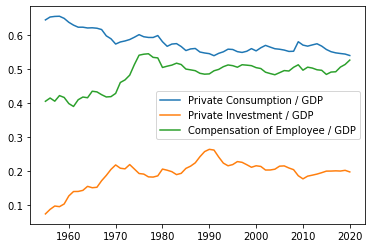

In [47]:
fig, ax = plt.subplots()
x = df["Year"]

y = df["Priv. Consumption"] / df["GDP"]
ax.plot(x, y, label="Private Consumption / GDP")

y = df["Priv. Inverstment"] / df["GDP"]
ax.plot(x, y, label="Private Investment / GDP")

y = df["Real Compensation of Employee"] / df["GDP"]
ax.plot(x, y, label="Compensation of Employee / GDP")

ax.legend()
plt.show()

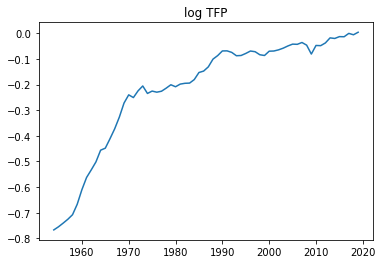

In [48]:
fig, ax = plt.subplots()
x = df["Year"]
y = np.log(df["TFP"])
ax.plot(x, y)
ax.set_title("log TFP")
plt.show()

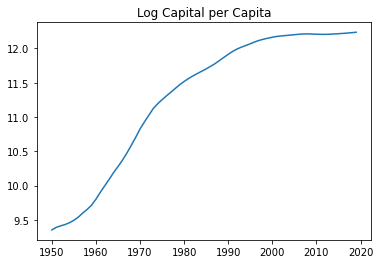

In [49]:
fig, ax = plt.subplots()
x = df["Year"]
y = np.log(df["Capital"] / df["Population"])
ax.plot(x, y)
ax.set_title("Log Capital per Capita")
plt.show()

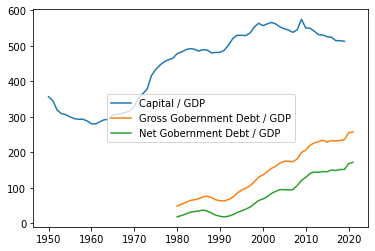

In [50]:
fig, ax = plt.subplots()
x = df["Year"]

y = df["Capital"] / df["Penn GDP"] * 100
ax.plot(x, y, label="Capital / GDP")

y = df["Gross Debt"]
ax.plot(x, y, label="Gross Gobernment Debt / GDP")

y = df["Net Debt"]
ax.plot(x, y, label="Net Gobernment Debt / GDP")

ax.legend()
plt.show()


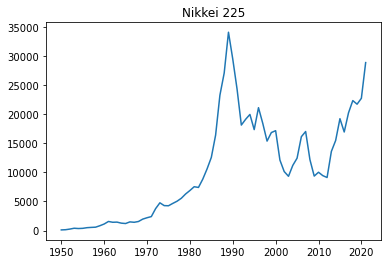

In [51]:
fig, ax = plt.subplots()
x = df["Year"]
y = df["Nikkei225"]
ax.plot(x, y)
ax.set_title("Nikkei 225")
plt.show()


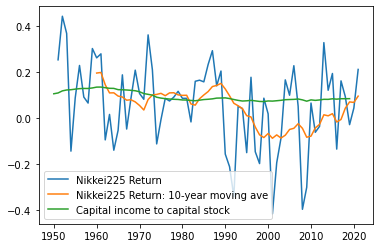

In [52]:
df["Nikkei225 Return"] = (df["Nikkei225"] - df["Nikkei225"].shift(1)) / df["Nikkei225"]

fig, ax = plt.subplots()
x = df["Year"]

y = df["Nikkei225 Return"]
ax.plot(x, y, label="Nikkei225 Return")

y = df['Nikkei225 Return'].rolling(10).mean()
ax.plot(x, y, label="Nikkei225 Return: 10-year moving ave")

y = df["Penn GDP"] *(1 - df["Labor Share"]) / df["Capital"]
ax.plot(x, y, label="Capital income to capital stock")

ax.legend()

plt.show()

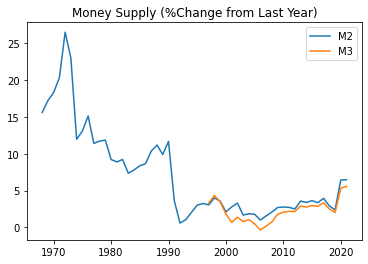

In [53]:
fig, ax = plt.subplots()
x = df["Year"]

y = df["M2"]
ax.plot(x, y, label="M2")

y = df["M3"]
ax.plot(x, y, label="M3")

ax.legend()
ax.set_title("Money Supply (%Change from Last Year)")
plt.show()


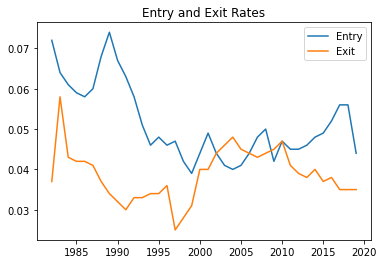

In [54]:
fig, ax = plt.subplots()
x = df["Year"]

y = df["Entry"]
ax.plot(x, y, label="Entry")

y = df["Exit"]
ax.plot(x, y, label="Exit")

ax.legend()
ax.set_title("Entry and Exit Rates")
plt.show()
